# Transient 1D Heat Conduction

In [181]:
import sympy as smp

from sympy import * 

# from sympy import symbols, Eq, Function, dsolve, lambdify, exp, cos, sin
from sympy.calculus.util import periodicity
import numpy as np


import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [182]:
smp.init_printing(pretty_print=True)

In [183]:
# starting from basically the solution ..
x, tau = symbols("X tau")
theta = symbols("θ", cls=Function)(x, tau)
theta


In [184]:
# Bi = 2
lam, A, B, Bi = symbols("lambda A B, Bi")
lam = symbols("lambda", real=True, positive=True)
lam
Bi

In [185]:
sol = exp(-lam**2*tau) * (A*cos(lam*x) + B*sin(lam*x))
gen_eq = Eq(theta, sol )
gen_eq

In [186]:
bc1_eq = Eq(gen_eq.rhs.diff(x).subs(x,0), 0)
# bc1_sol = bc1_eq
B_solve = smp.solve(bc1_eq, B)[0]
B_solve

In [187]:
gen_eq2 = Eq(theta, gen_eq.rhs.subs(B, B_solve))
gen_eq2

In [188]:
bc2_eq = Eq(gen_eq2.rhs.diff(x).subs(x,1), -Bi*gen_eq2.rhs.subs(x,1))
bc2_eq 

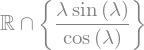

In [197]:
Bi_solve = smp.solveset(bc2_eq, Bi, domain=smp.S.Reals)
Bi_solve # has infinite values... 

In [235]:
# solution is a linear combination of thetas...
index_eq = gen_eq2.rhs.subs([(lam, Indexed("lambda", n)),
        (A, Indexed("A", n))])
# gen_eq3 = Eq(theta, Sum(), 
#         (n, 1, 10)))
# gen_eq3
index_eq
# Sum(gen_eq2.rhs.subs(lam, Indexed("lambda", n)), (n, 1, 3))#.doit()

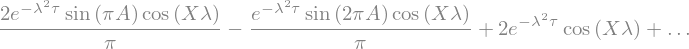

In [238]:
fs = fourier_series(gen_eq2.rhs, (A, 1, 3))
fs

In [240]:
type(fs)

sympy.series.fourier.FourierSeries

In [241]:
fs.an

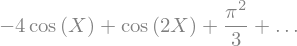

In [232]:
s = fourier_series(x**2, (x, -pi, pi))
s

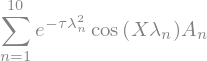

In [206]:
gen_eq3.rhs

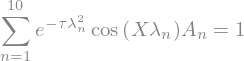

In [207]:
# solve An using initial condution 
ic_eq = Eq(gen_eq3.rhs, 1)
ic_eq

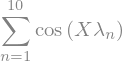

In [220]:
cos_m = Sum(cos(Indexed("lambda", n)*x), (n, 1, 10))
cos_m

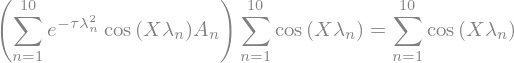

In [224]:
ic_eq2 = Eq(gen_eq3.rhs*cos_m, 1*cos_m)
ic_eq2

# ic_eq.rhs*cos(Indexed("lambda", m))

KeyboardInterrupt: 

In [204]:
An_solve = solve(ic_eq, A_n)
An_solve

NameError: name 'A_n' is not defined